# EDA

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import webbrowser


In [ ]:
%pip install ydata-profiling

In [2]:
# Para activar el mostrar advertencias
warnings.simplefilter('ignore')

In [6]:
# Import as Dataframe 
df = pd.read_csv('Housing_Price_Prediction_ML/data/house_data.csv', parse_dates=['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**To visualize it better, I prefer converting it to square meters (m2)**

In [7]:
# Columns to convert
columns_to_convert = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','sqft_living15','sqft_lot15']

# Convert to m2
for column in columns_to_convert:
    df[column] = df[column] * 0.092903



# New DataFrame
print("\nAfter conversion:")
df.head()


After conversion:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950
1,6414100192,2014-12-09,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017
2,5631500400,2015-02-25,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986
3,2487200875,2014-12-09,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000
4,1954400510,2015-02-18,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209


In [8]:
# Rename 'sqft' by 'm2'
df.rename(columns=lambda x: x.replace('sqft', 'm2') if 'sqft' in x else x, inplace=True)
df.head()

,id,date,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,grade,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950
1,6414100192,2014-12-09,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017
2,5631500400,2015-02-25,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986
3,2487200875,2014-12-09,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000
4,1954400510,2015-02-18,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209


In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312057
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21613.0,540088.141767,75000.0,321950.0,450000.0,645000.0,7700000.0,367127.196483
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
m2_living,21613.0,193.228925,26.94187,132.572581,177.44473,236.90265,1257.90662,85.325915
m2_lot,21613.0,1403.482608,48.30956,468.23112,707.735054,992.947264,153416.205177,3848.089781
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318


In [10]:
# Count of null values per column.
missing_values = df.isnull().sum()
missing_values

id              0
date            0
price           0
bedrooms        0
bathrooms       0
m2_living       0
m2_lot          0
floors          0
waterfront      0
view            0
condition       0
grade           0
m2_above        0
m2_basement     0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
m2_living15     0
m2_lot15        0
dtype: int64

In [14]:
from ydata_profiling import ProfileReport

In [15]:
profile = ProfileReport(df, title="Profiling Report", explorative=True)
profile.to_file("your_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 21.08it/s]


In [18]:

# Ruta del archivo generado
file_path = "profile_report.html"

# Abrir en el navegador predeterminado
webbrowser.open(file_path)


True

# UNIVARIATE

## TARGET 

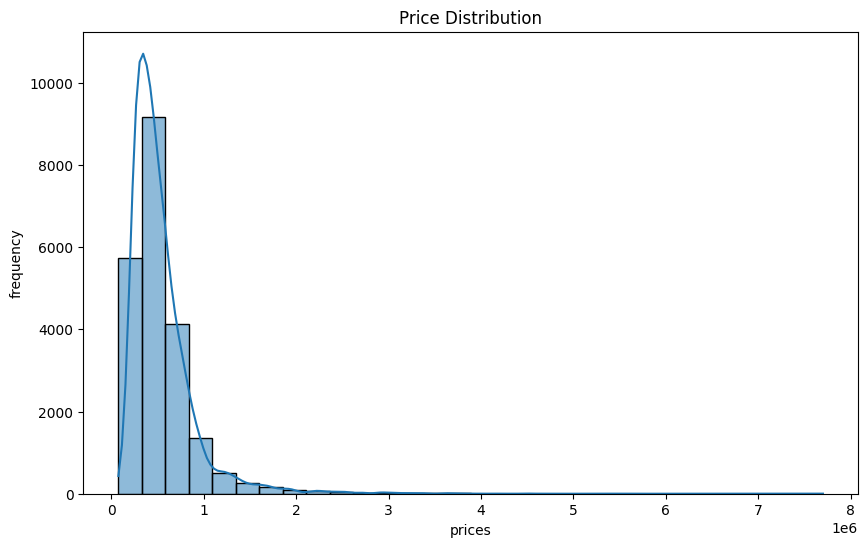

<Figure size 640x480 with 0 Axes>

In [7]:
# Target Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)  # Usa 'target' como columna
plt.title('Price Distribution')
plt.xlabel('prices')
plt.ylabel('frequency')
plt.show()

# Save the plot as a PNG file
plt.savefig('Price Distribution.png', dpi=300, bbox_inches='tight')

## M2_Living (numeric variable)

In [19]:
df['m2_living'].value_counts()

m2_living
120.773900    138
130.064200    135
133.780320    133
167.225400    129
154.218980    129
             ... 
918.810670      1
518.770352      1
182.182783      1
531.405160      1
132.386775      1
Name: count, Length: 1038, dtype: int64

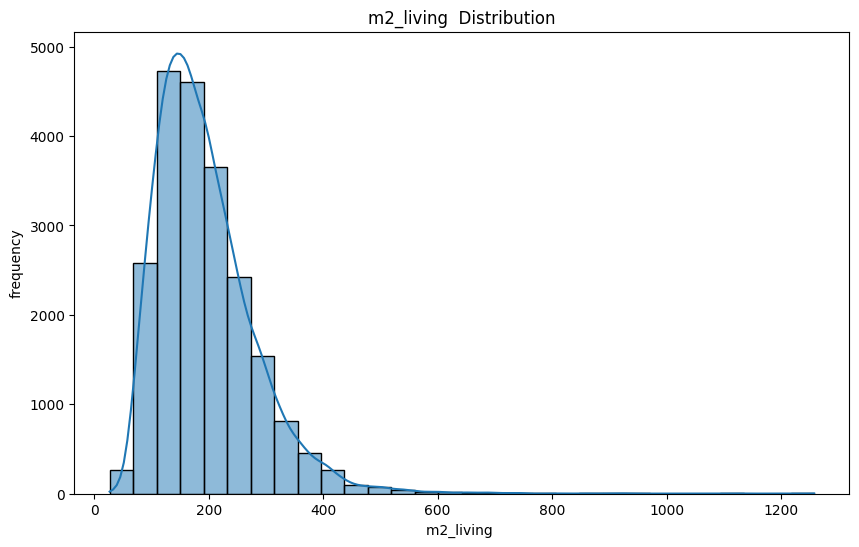

In [35]:
# m2_living Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['m2_living'], kde=True, bins=30)  
plt.title('m2_living  Distribution')
plt.xlabel('m2_living ')
plt.ylabel('frequency')
plt.show()

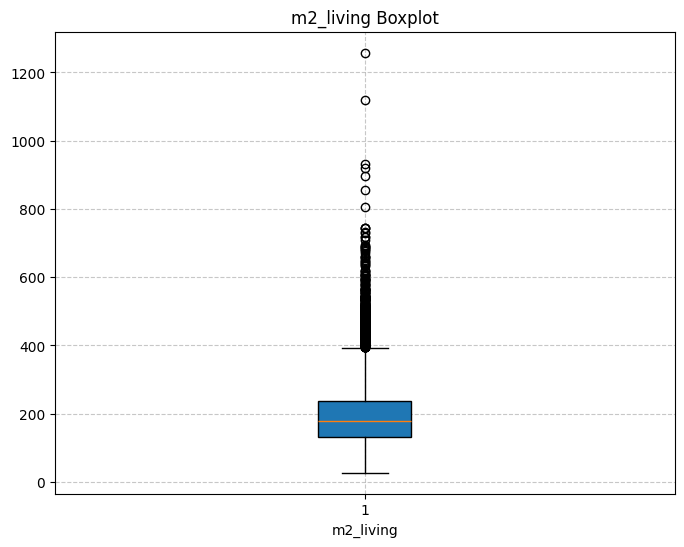

In [33]:
#Boxplot
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico
plt.boxplot(df['m2_living'], vert=True, patch_artist=True)
plt.title('m2_living Boxplot')
plt.xlabel('m2_living')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Grade (Categorical Ordinal Variable)

In [21]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

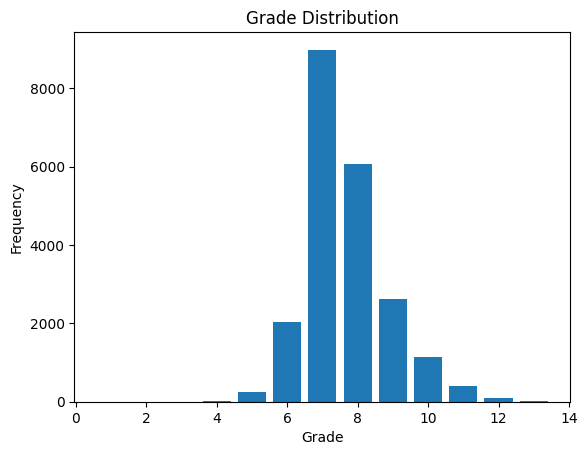

In [36]:
# Bar PLot
count = df['grade'].value_counts(sort=False)  

plt.bar(count.index, count.values)
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

## M2_Above (numeric variable)

In [25]:
df['m2_above'].value_counts()

m2_above
120.773900    212
93.832030     210
111.483600    206
113.341660    192
105.909420    184
             ... 
341.325622      1
276.758037      1
221.294946      1
584.359870      1
132.386775      1
Name: count, Length: 946, dtype: int64

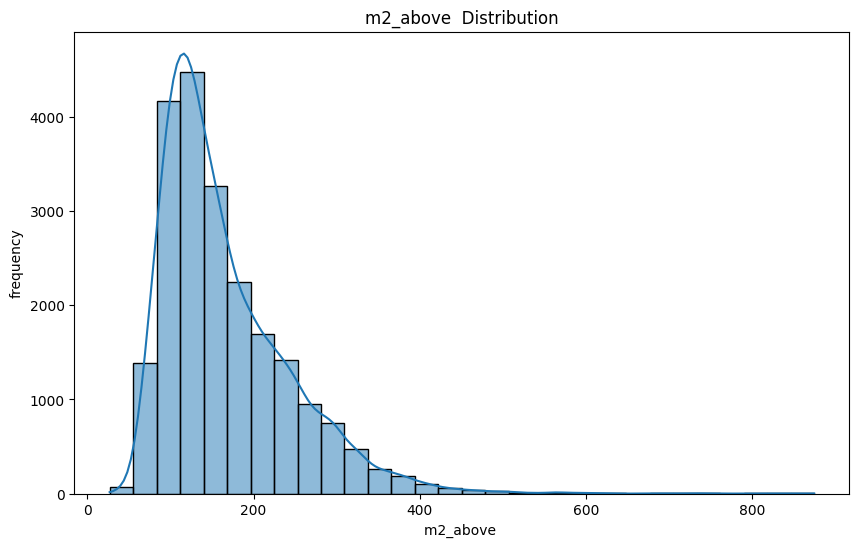

In [ ]:
# m2_above Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['m2_above'], kde=True, bins=30) 
plt.title('m2_above  Distribution')
plt.xlabel('m2_above ')
plt.ylabel('frequency')
plt.show()

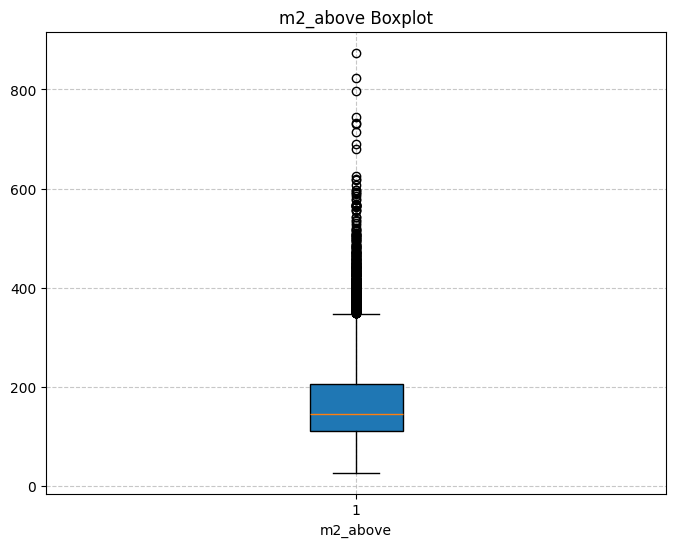

In [ ]:
#Boxplot
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico
plt.boxplot(df['m2_above'], vert=True, patch_artist=True)
plt.title('m2_above Boxplot')
plt.xlabel('m2_above')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## M2_Living 15 (numeric variable)

In [29]:
df['m2_living15'].value_counts()

m2_living15
143.070620    197
133.780320    195
144.928680    192
139.354500    181
135.638380    169
             ... 
190.822762      1
347.085608      1
459.869850      1
253.439384      1
271.927081      1
Name: count, Length: 777, dtype: int64

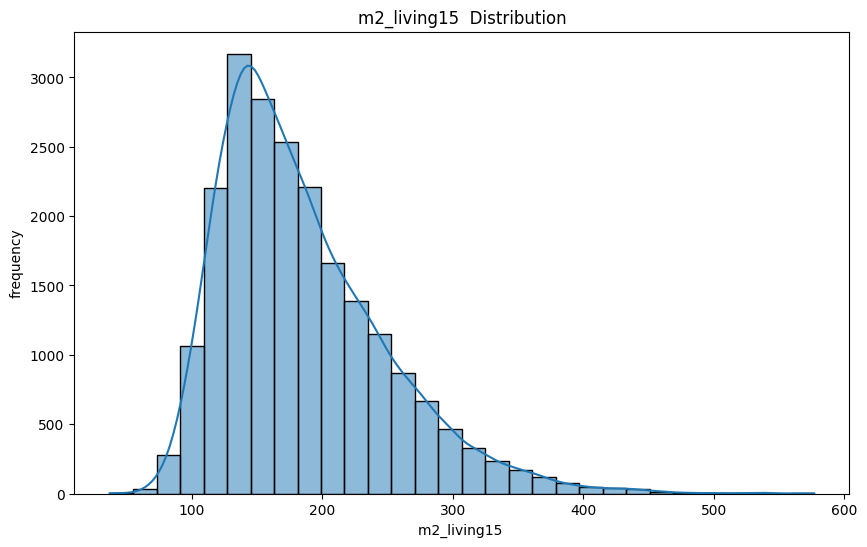

In [30]:
# m2_living15 histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['m2_living15'], kde=True, bins=30) 
plt.title('m2_living15  Distribution')
plt.xlabel('m2_living15 ')
plt.ylabel('frequency')
plt.show()

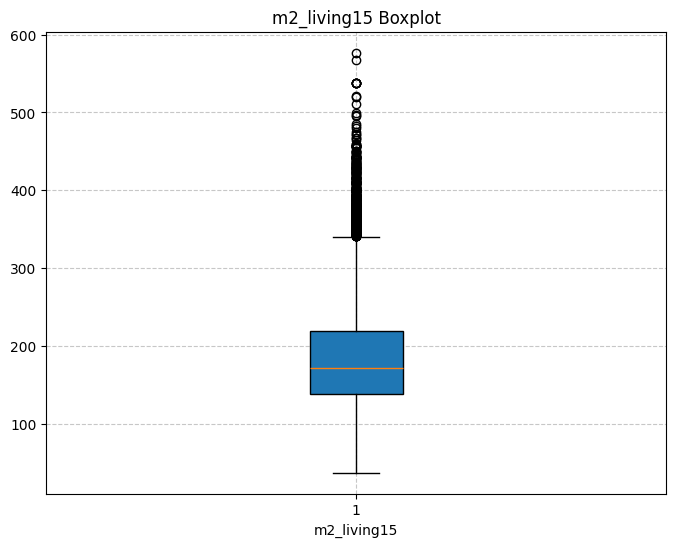

In [37]:
#Box Plot
plt.figure(figsize=(8, 6))  
plt.boxplot(df['m2_living15'], vert=True, patch_artist=True)
plt.title('m2_living15 Boxplot')
plt.xlabel('m2_living15')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Bathrooms (numeric variable)

In [38]:
df['bathrooms'].value_counts()

bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64

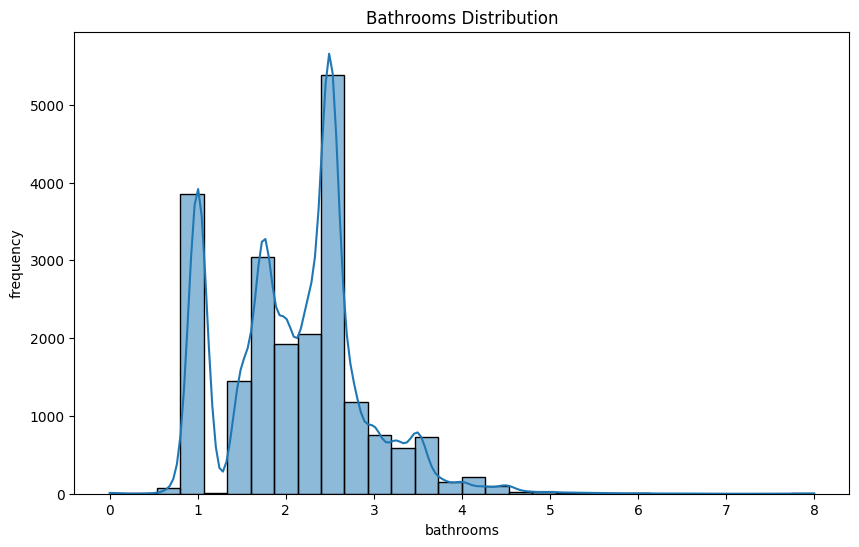

In [39]:
# Bathrooms Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bathrooms'], kde=True, bins=30) 
plt.title('Bathrooms Distribution')
plt.xlabel('bathrooms')
plt.ylabel('frequency')
plt.show()

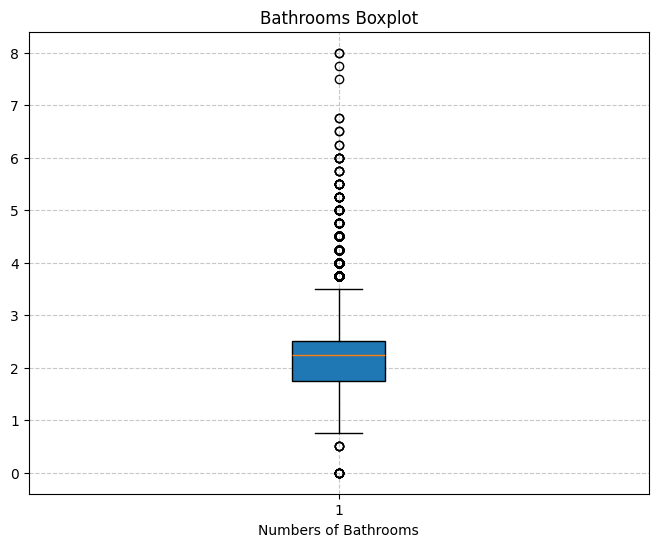

In [40]:
#Box Plot
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico
plt.boxplot(df['bathrooms'], vert=True, patch_artist=True)
plt.title('Bathrooms Boxplot')
plt.xlabel('Numbers of Bathrooms')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## View (Categorial ordinal variable)

In [41]:
df['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

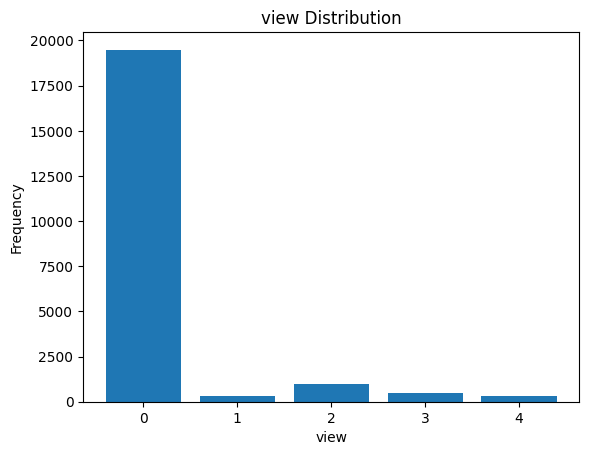

In [42]:
# Bar PLot
count = df['view'].value_counts(sort=False)  

plt.bar(count.index, count.values)
plt.title('view Distribution')
plt.xlabel('view')
plt.ylabel('Frequency')
plt.show()

### m2_Basement (numeric variable)

In [44]:
df['m2_basement'].value_counts()

m2_basement
0.000000     13126
55.741800      221
65.032100      218
46.451500      214
74.322400      206
             ...  
48.123754        1
34.745722        1
72.835952        1
84.170118        1
23.039944        1
Name: count, Length: 306, dtype: int64

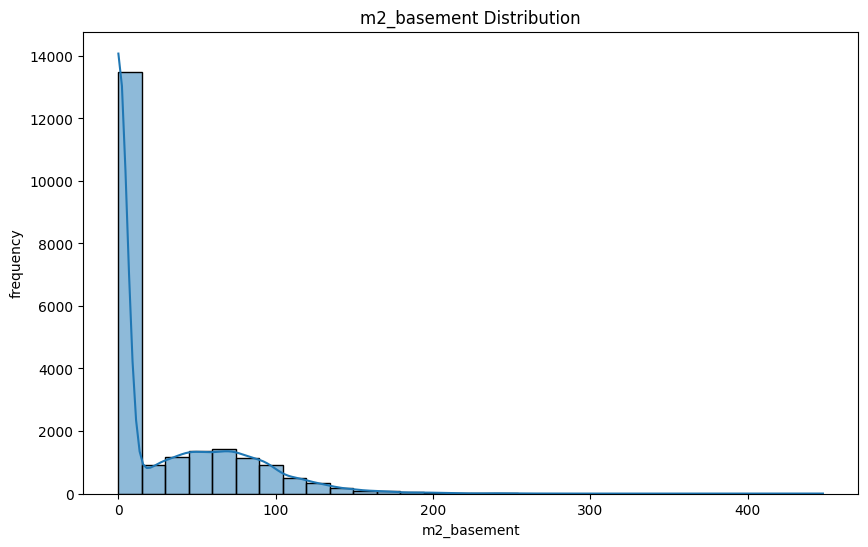

In [45]:
# m2_basement Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['m2_basement'], kde=True, bins=30) 
plt.title('m2_basement Distribution')
plt.xlabel('m2_basement')
plt.ylabel('frequency')
plt.show()

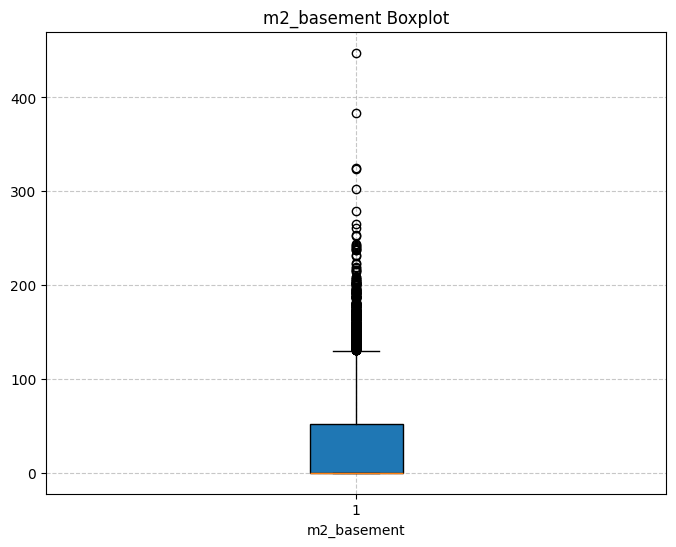

In [46]:
#Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['m2_basement'], vert=True, patch_artist=True)
plt.title('m2_basement Boxplot')
plt.xlabel('m2_basement')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Bedrooms (Numeric variable)

In [11]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

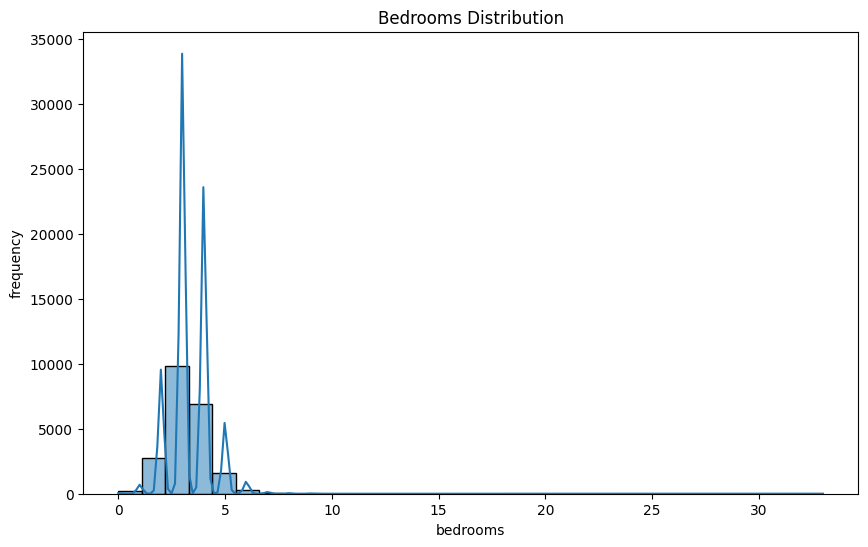

In [12]:
# Bedrooms Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'], kde=True, bins=30) 
plt.title('Bedrooms Distribution')
plt.xlabel('bedrooms')
plt.ylabel('frequency')
plt.show()

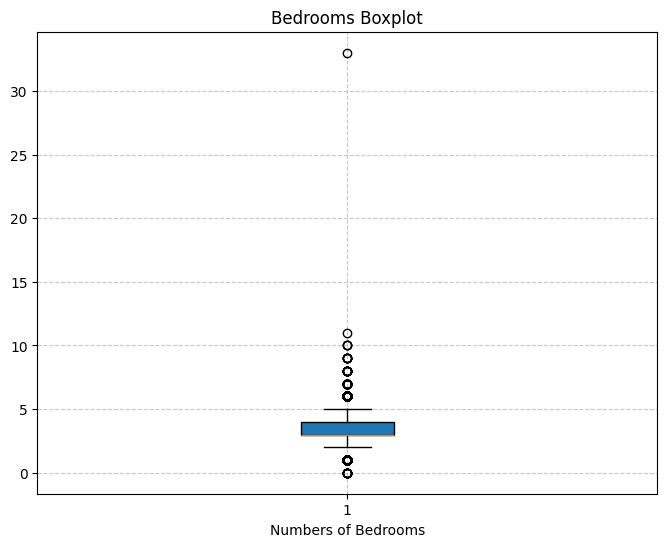

In [ ]:
#Boxplot
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['bedrooms'], vert=True, patch_artist=True)
plt.title('Bedrooms Boxplot')
plt.xlabel('Numbers of Bedrooms')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Waterfront (Binary)

In [47]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

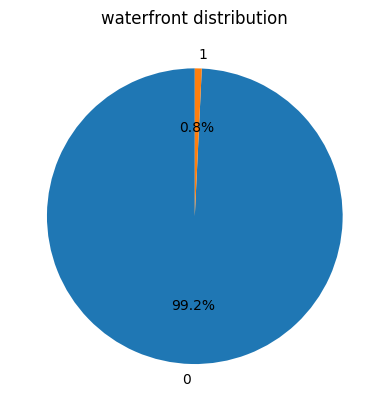

In [48]:
count = df['waterfront'].value_counts()

plt.pie(count.values, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('waterfront distribution')
plt.show()


### Floors (Numeric variable)

In [49]:
df['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

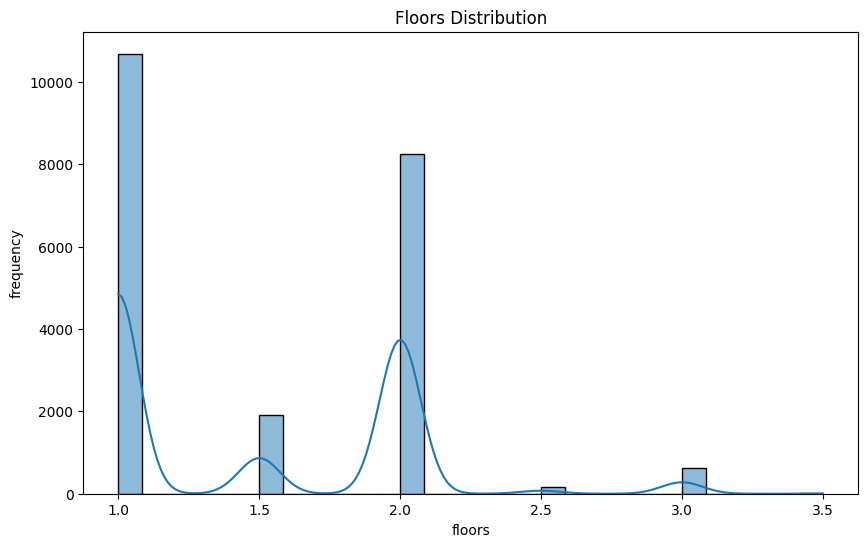

In [ ]:
# Floors Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['floors'], kde=True, bins=30) 
plt.title('Floors Distribution')
plt.xlabel('floors')
plt.ylabel('frequency')
plt.show()

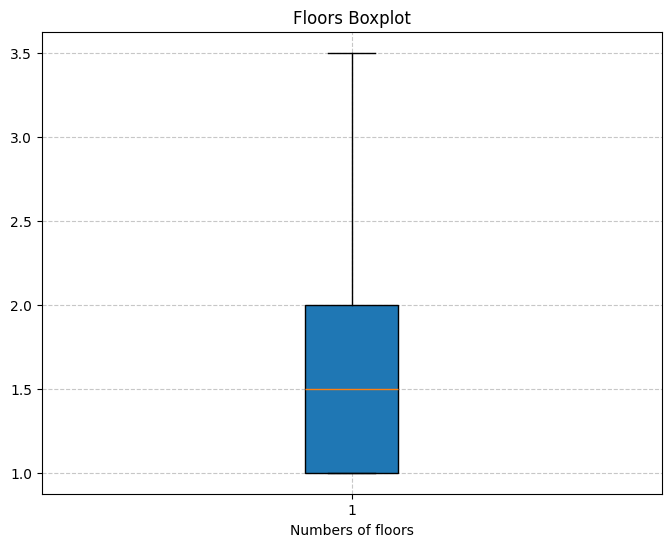

In [53]:
#Boxplot
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['floors'], vert=True, patch_artist=True)
plt.title('Floors Boxplot')
plt.xlabel('Numbers of floors')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Yr_Renovated (Categorical Ordinal Variable)

In [54]:
df['yr_renovated'].value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

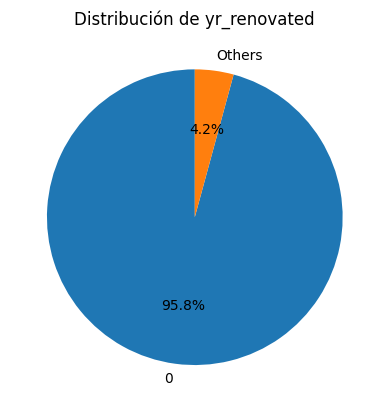

In [ ]:

# Agrupa los valores menos frecuentes
threshold = 100  # Número mínimo de ocurrencias para no agrupar
count = df['yr_renovated'].value_counts()
other = count[count < threshold].sum()  # Suma valores menores al umbral
count = count[count >= threshold]  # Mantén solo valores mayores al umbral
count['Others'] = other  # Agrega los valores agrupados como "Otros"

# Genera el gráfico
plt.pie(count.values, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de yr_renovated')
plt.show()


### m2_Lot (Numeric Variable)

In [57]:
df['m2_lot'].value_counts()

m2_lot
464.515000     358
557.418000     290
371.612000     251
668.901600     220
445.934400     120
              ... 
2345.614944      1
922.898402       1
849.319226       1
2260.329990      1
99.963628        1
Name: count, Length: 9782, dtype: int64

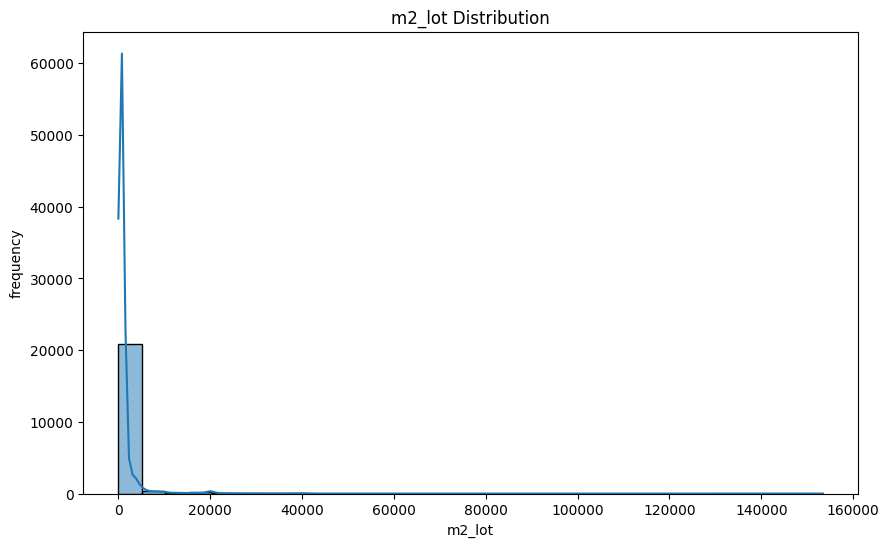

In [58]:
# m2_lot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['m2_lot'], kde=True, bins=30) 
plt.title('m2_lot Distribution')
plt.xlabel('m2_lot')
plt.ylabel('frequency')
plt.show()

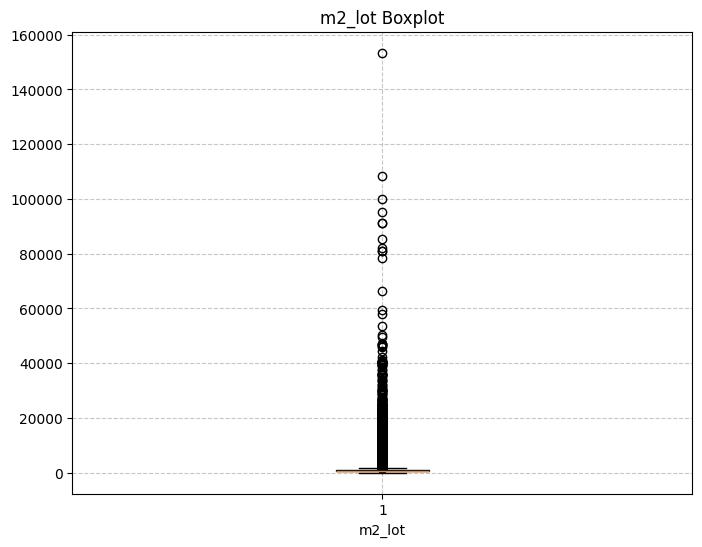

In [59]:
#Boxplot
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['m2_lot'], vert=True, patch_artist=True)
plt.title('m2_lot Boxplot')
plt.xlabel('m2_lot')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Yr_Built (Numeric Variable)

In [60]:
df['yr_built'].value_counts()

yr_built
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

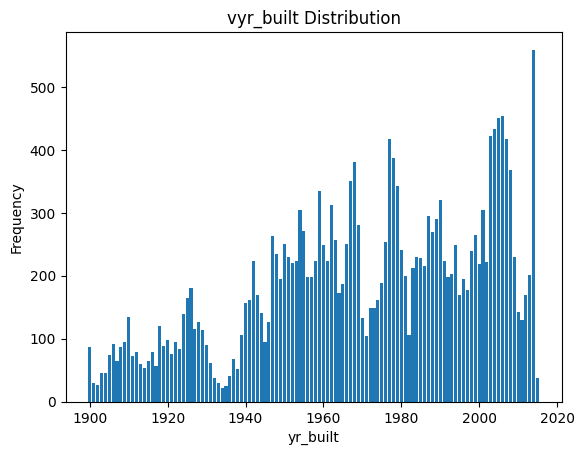

In [62]:
# Bar PLot
count = df['yr_built'].value_counts(sort=False)  

plt.bar(count.index, count.values)
plt.title('vyr_built Distribution')
plt.xlabel('yr_built')
plt.ylabel('Frequency')
plt.show()

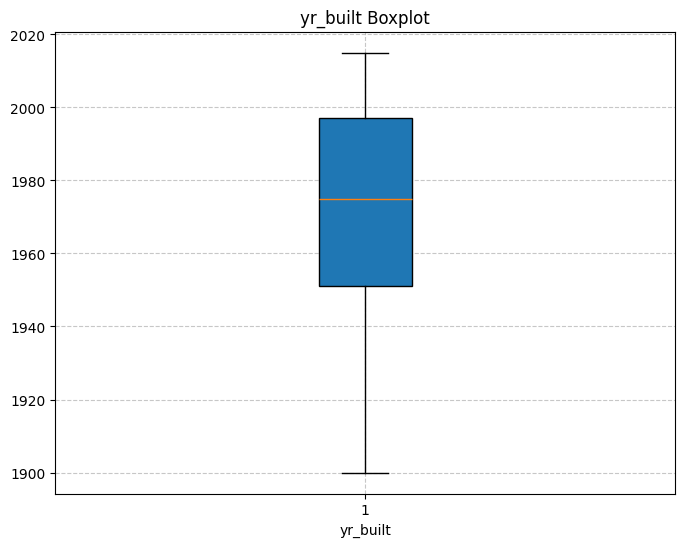

In [63]:
#Boxplot
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['yr_built'], vert=True, patch_artist=True)
plt.title('yr_built Boxplot')
plt.xlabel('yr_built')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Condition (Categorical Ordinal Variable)

In [64]:
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

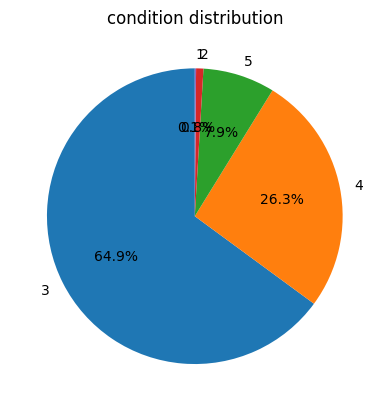

In [ ]:
count = df['condition'].value_counts()

plt.pie(count.values, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('condition distribution')
plt.show()

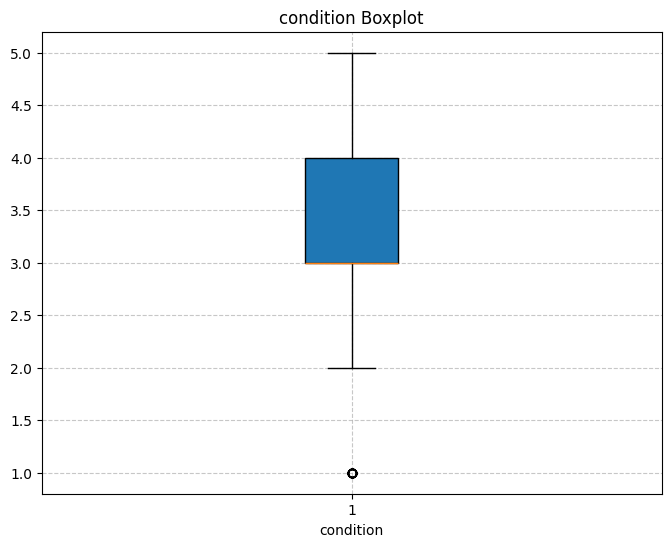

In [66]:
#Boxplot
plt.figure(figsize=(8, 6)) 
plt.boxplot(df['condition'], vert=True, patch_artist=True)
plt.title('condition Boxplot')
plt.xlabel('condition')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Zipcode (Categorical Nominal Variable)

In [68]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [67]:
#Se puede hacer un hot code encoding. No son demasiados valores únicos.
df['zipcode'].nunique()

70

## BIVARIATE

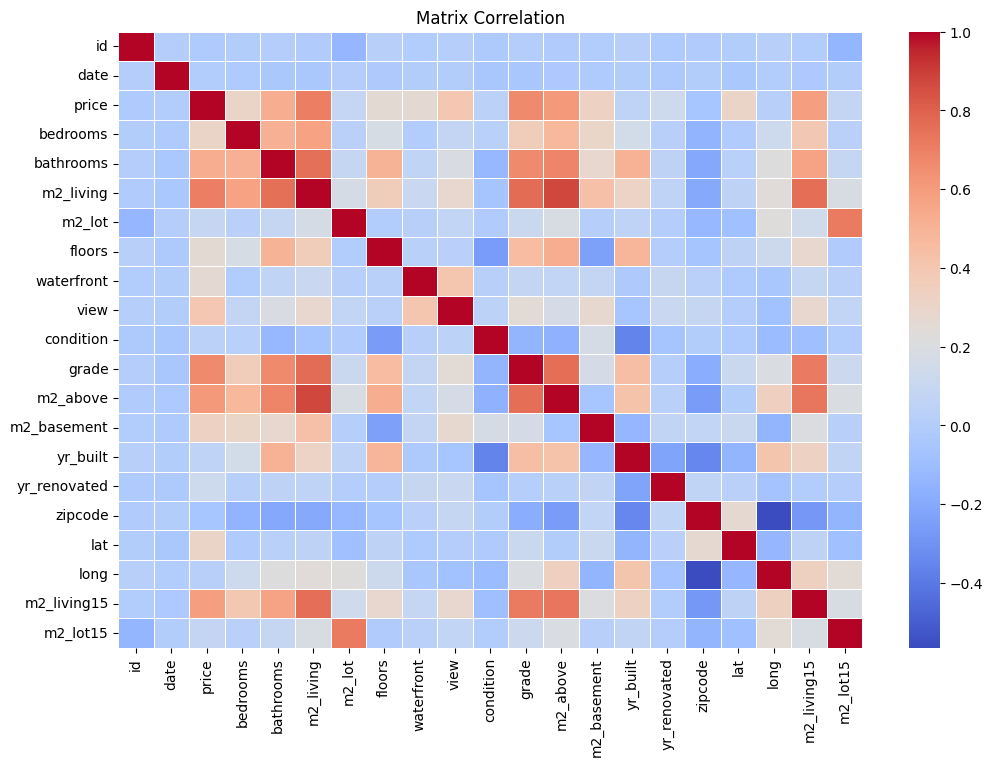

In [42]:
# Correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrix Correlation')
plt.show()

In [43]:
# Calcular correlación entre todas las variables
correlation_matrix = df.corr()

# Correlación de cada variable con el target (price)
target_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Mostrar correlaciones
print("Correlación de cada variable con el target (price):")
print(target_correlation)

Correlación de cada variable con el target (price):
price           1.000000
m2_living       0.702035
grade           0.667434
m2_above        0.605567
m2_living15     0.585379
bathrooms       0.525138
view            0.397293
m2_basement     0.323816
bedrooms        0.308350
lat             0.307003
waterfront      0.266369
floors          0.256794
yr_renovated    0.126434
m2_lot          0.089661
m2_lot15        0.082447
yr_built        0.054012
condition       0.036362
long            0.021626
date           -0.004357
id             -0.016762
zipcode        -0.053203
Name: price, dtype: float64


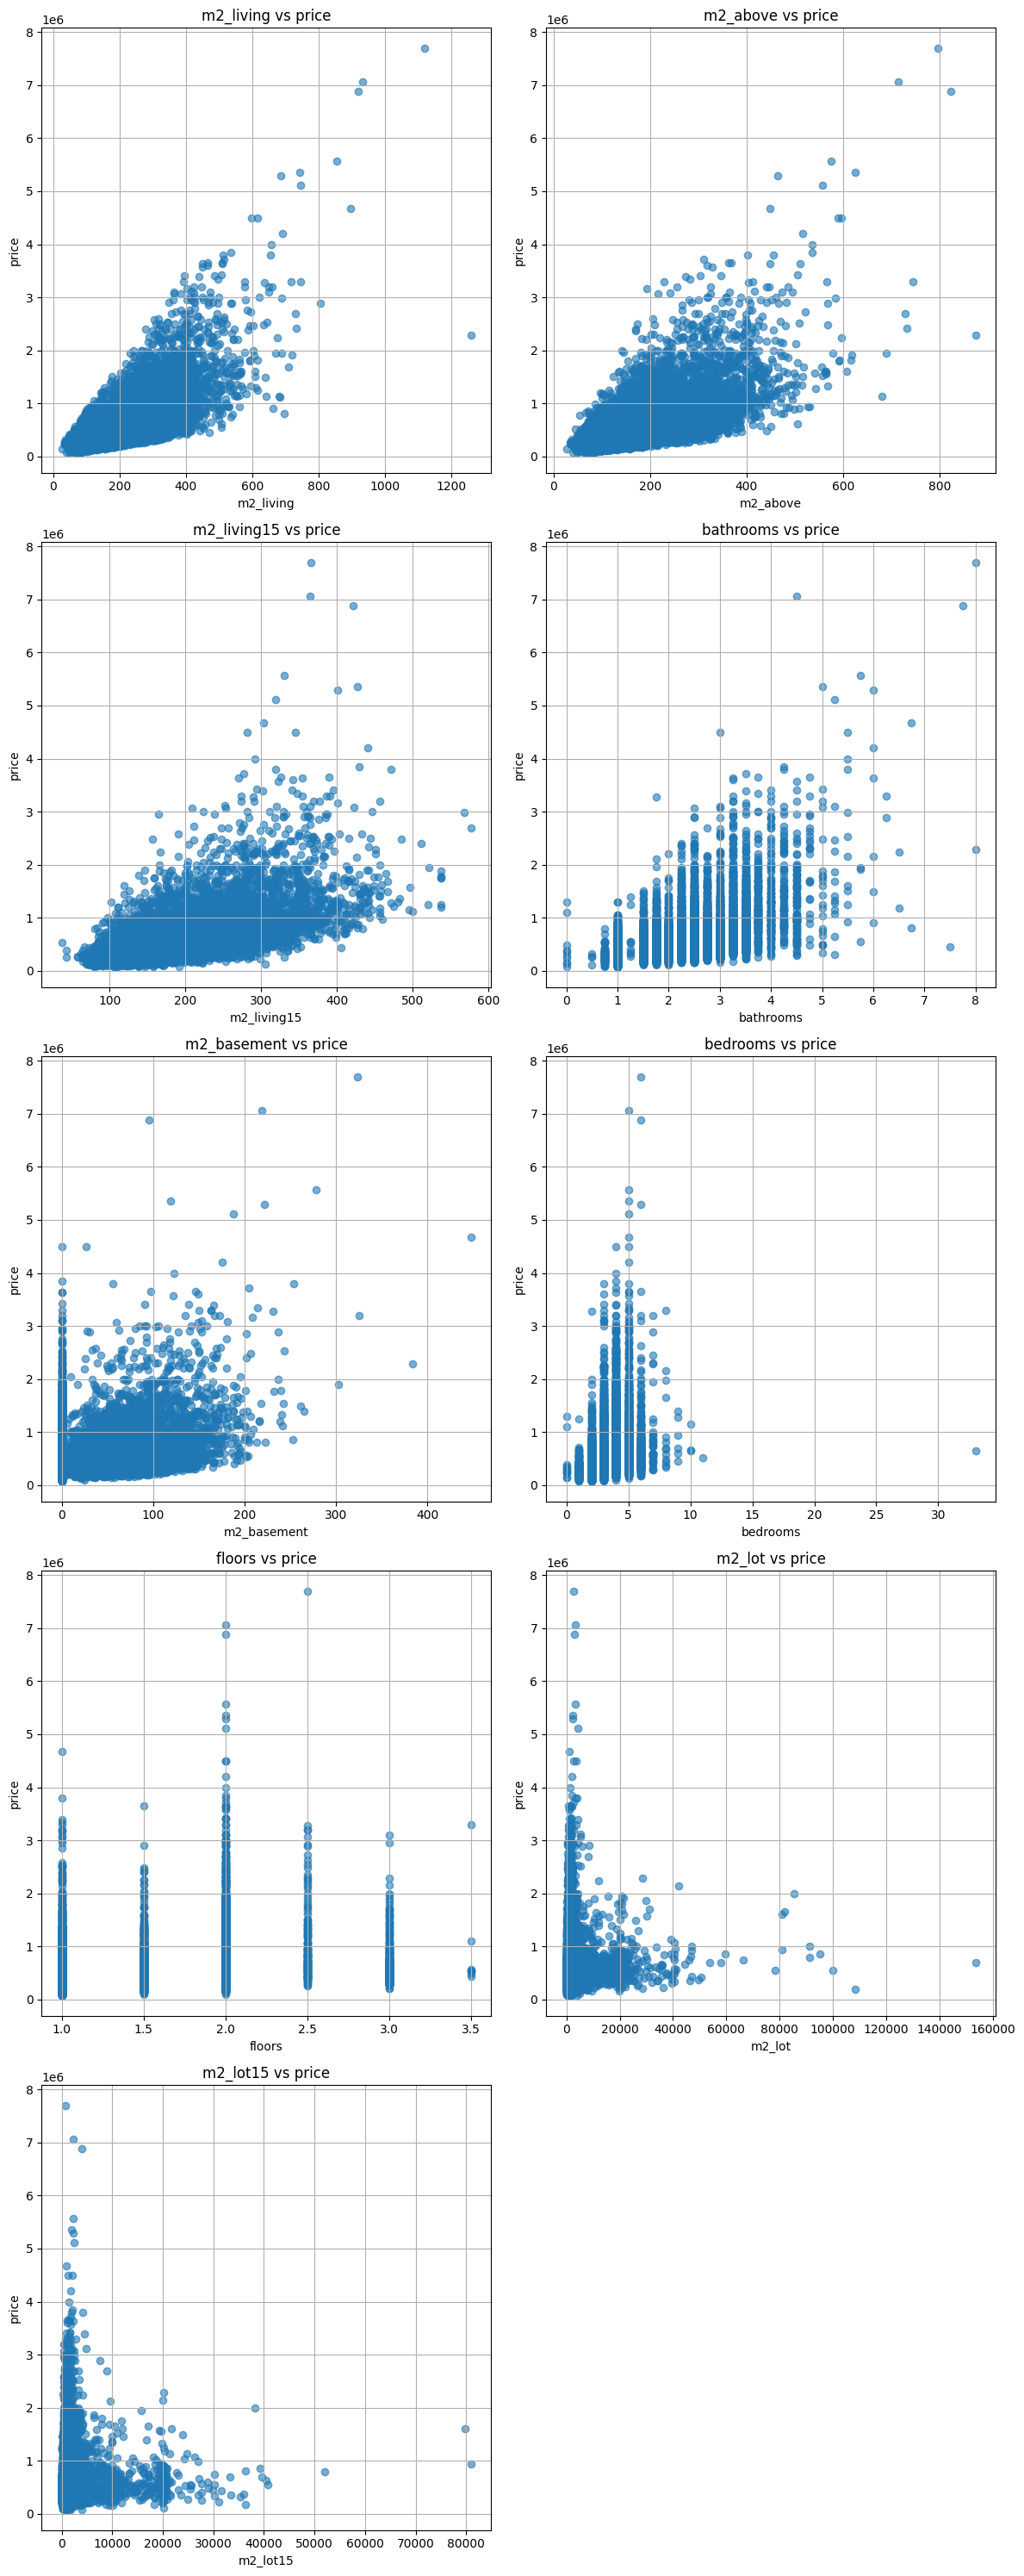

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables que deseas graficar
variables_a_graficar = ['m2_living', 'm2_above', 'm2_living15','bathrooms', 'm2_basement', 'bedrooms','floors', 'm2_lot', 'm2_lot15']
target = 'price'

# Número de columnas para las gráficas
num_columnas = 2
num_filas = -(-len(variables_a_graficar) // num_columnas)  # Redondeo hacia arriba

# Crear subplots
fig, axes = plt.subplots(num_filas, num_columnas, figsize=(12, 6 * num_filas))
axes = axes.flatten()  # Aplanar el arreglo para iterar fácilmente

# Generar gráficos
for i, variable in enumerate(variables_a_graficar):
    if variable in df.columns:
        axes[i].scatter(df[variable], df[target], alpha=0.6)
        axes[i].set_title(f'{variable} vs {target}')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel(target)
        axes[i].grid(True)
    else:
        axes[i].text(0.5, 0.5, f"'{variable}' no en DataFrame", ha='center', va='center', fontsize=12)
        axes[i].set_axis_off()

# Deshabilitar ejes vacíos si sobran subplots
for j in range(len(variables_a_graficar), len(axes)):
    axes[j].set_axis_off()

plt.tight_layout()
plt.show()


**I don't see a linear relationship between the variables and the target. We could explore logarithmic or polynomial transformations.**